In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import glob
from google.colab import drive
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#Importing Dataset

In [ ]:
train=pd.read_csv("C:\\Users\\RedPr\\Downloads\\Malignant Comment Project\\train.csv")


In [ ]:
test=pd.read_csv("C:\\Users\\RedPr\\Downloads\\Malignant Comment Project\\test.csv")


In [ ]:

train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train.shape

(159571, 8)

In [ ]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [ ]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

#Checking Null Values

In [ ]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


#Pre Cleaning Visualization

In [ ]:
text=[]
count=[]
for i in train.columns[2:]:
  text.append(i)
  a=train[i].value_counts()
  count.append(a[1])

In [ ]:
df=pd.DataFrame()
df['text']=text
df['count']=count

               text  count
0         malignant  15294
1  highly_malignant   1595
2              rude   8449
3            threat    478
4             abuse   7877
5            loathe   1405


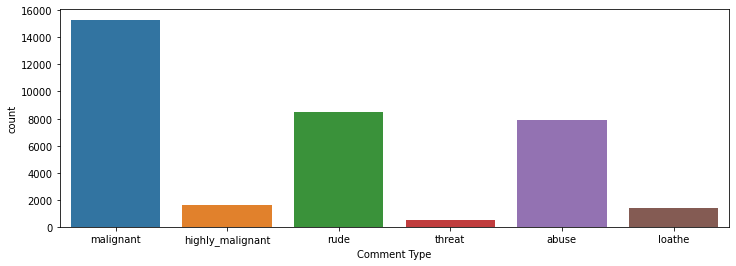

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['text'],y=df['count'])
plt.xlabel("Comment Type")
print(df)

In [ ]:
a=train.iloc[:,2:].sum(axis =1).value_counts()
b=a[1:].sum()


In [ ]:
a[0]+b

159571

In [ ]:
train.shape[0]

159571

In [ ]:
dd=pd.DataFrame({"Count":[a[0],b]})
dd.head()

,Count
0,143346
1,16225


Number of non abusive and abusive comments
    Count
0  143346
1   16225


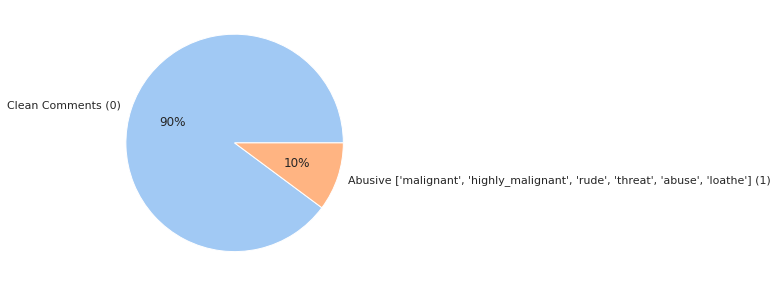

In [ ]:
plt.figure(figsize=(12,5))
month_sold=dd
palette_color = sns.color_palette('pastel')
l=["Clean Comments (0)",f"Abusive {text} (1)"]
plt.pie(month_sold,labels=l,colors=palette_color, autopct='%.0f%%')
print("Number of non abusive and abusive comments")
print(dd)
plt.show()

#Data Cleaning

In [84]:
y=pd.DataFrame()
y1=train.iloc[:,1:]
y["Malignant Comment"]=y1.sum(axis =1)
print("Sum of each row:\n",y.value_counts())
y["Malignant Comment"] = y > 0 
y["Malignant Comment"] = y.astype(int)
print("\nSum greater than 1 indicates abuse:\n",y.value_counts())

Sum of each row:
 Malignant Comment
0                    143346
1                      6360
3                      4209
2                      3480
4                      1760
5                       385
6                        31
dtype: int64

Sum greater than 1 indicates abuse:
 Malignant Comment
0                    143346
1                     16225
dtype: int64


In [85]:
for i in train.columns[2:]:
  train=train.drop([i],axis=1)

dff=pd.concat([train,y],axis=1)
dff.head()

,id,comment_text,Malignant Comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [86]:
dff=dff.drop(['id'],axis=1)
dff.head()

,comment_text,Malignant Comment
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [87]:
dff.iloc[0,0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [88]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_http(text):
    return re.sub(r'http\S+', '', text)

In [89]:
dff['comment_text']=dff['comment_text'].apply(strip_html)

In [90]:
dff['comment_text']=dff['comment_text'].apply(remove_http)
dff["comment_text"] = dff["comment_text"].apply(lambda x: " ".join(x for x in x.split() if '.com' not in x))
dff["comment_text"] = dff["comment_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [91]:
dff["comment_text"] = dff["comment_text"].str.replace('\d','')
dff["comment_text"] = dff["comment_text"].str.replace('[^\w\s]','')

In [92]:
from nltk.corpus import stopwords
import re,string
s = set(stopwords.words("english"))
p = list(string.punctuation)
s.update(p)

dff["comment_text"] = dff["comment_text"].apply(lambda x: " ".join(x for x in x.split() if x not in s))

In [93]:
from textblob import Word
dff["comment_text"] = dff["comment_text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [94]:
dff["comment_text"] = dff["comment_text"].apply(lambda x: ' '.join( [x for x in x.split() if len(x)>1] ))

In [95]:
train.iloc[0,1]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [96]:
dff.iloc[0,0]

'explanation edits made username hardcore metallica fan reverted werent vandalism closure gas voted new york doll fac please dont remove template talk page since im retired'

In [97]:
train.iloc[0,1]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [99]:
for i in range(dff.shape[0]):
    if (not(dff.iloc[i,0] and dff.iloc[i,0].strip())):
      dff=dff.drop(i)

# Post Cleaning Visualization

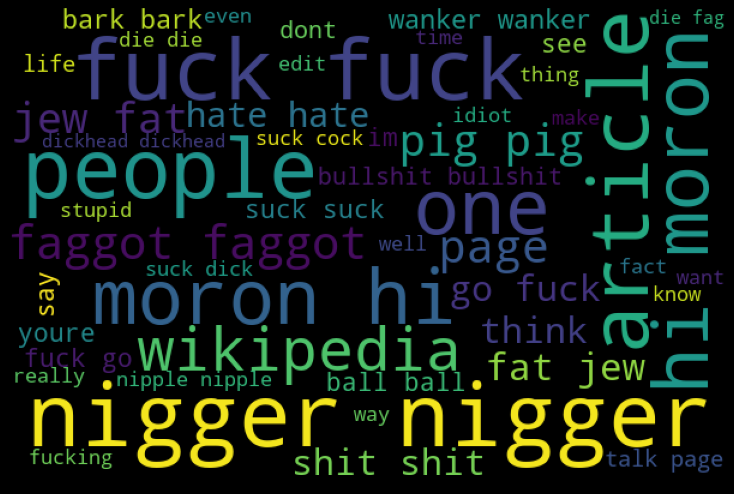

In [62]:
from wordcloud import WordCloud
hams = dff['comment_text'][dff["Malignant Comment"]==1]
word_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**- Malignant Word Cloud**

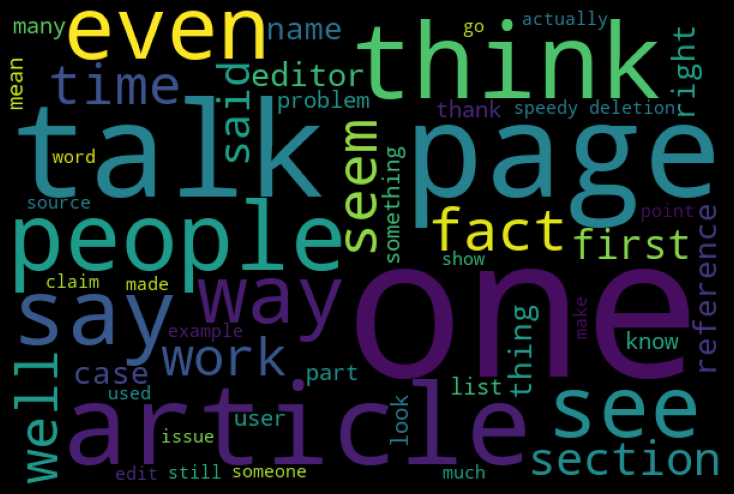

In [63]:
from wordcloud import WordCloud
hams = dff['comment_text'][dff["Malignant Comment"]==0]
word_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**- Non Malignant Word Cloud**

In [64]:
from collections import Counter
corpus2 = []
for i in dff.comment_text:
    for j in i.split():
        corpus2.append(j.strip())

counter = Counter(corpus2)
common_words = counter.most_common(10)
dict(common_words)

{'article': 72968,
 'page': 56489,
 'wikipedia': 35601,
 'talk': 31789,
 'one': 29933,
 'please': 29616,
 'would': 29212,
 'like': 28131,
 'dont': 26102,
 'see': 21696}

In [65]:
from collections import Counter
corpus = []
for i in dff.comment_text:
    for j in i.split():
        corpus.append(j.strip())

counter = Counter(corpus)
common_words = counter.most_common(10)
dict(common_words)

{'article': 72968,
 'page': 56489,
 'wikipedia': 35601,
 'talk': 31789,
 'one': 29933,
 'please': 29616,
 'would': 29212,
 'like': 28131,
 'dont': 26102,
 'see': 21696}

In [66]:
unigram=(pd.Series(nltk.ngrams(corpus, 1)).value_counts())
unigram

(article,)          72968
(page,)             56489
(wikipedia,)        35601
(talk,)             31789
(one,)              29933
                    ...  
(encyklopedia,)         1
(kinkladze,)            1
(macedonarmans,)        1
(ethimologie,)          1
(ciu,)                  1
Length: 207882, dtype: int64

In [67]:
bigram=(pd.Series(nltk.ngrams(corpus, 2)).value_counts())
bigram

(talk, page)          15429
(speedy, deletion)     4404
(would, like)          3621
(reliable, source)     3078
(dont, know)           3034
                      ...  
(whg, west)               1
(farmer, whg)             1
(european, farmer)        1
(early, european)         1
(helping, rewrite)        1
Length: 2655576, dtype: int64

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    print(vec.vocabulary_)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



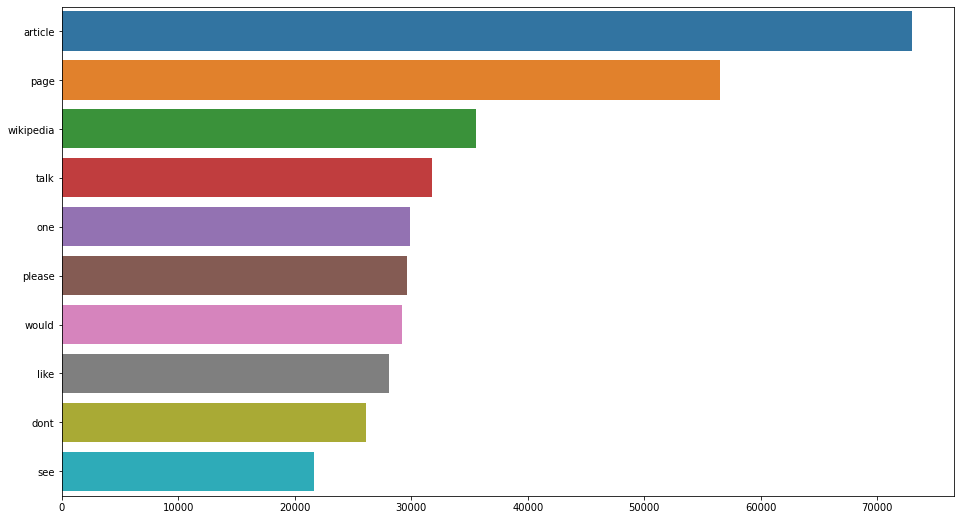

In [69]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(dff.comment_text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



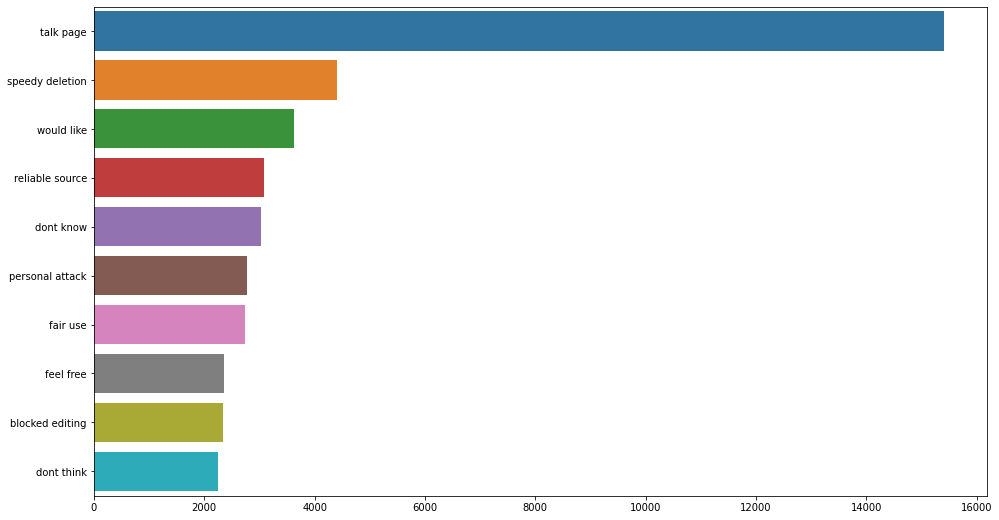

In [70]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(dff.comment_text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



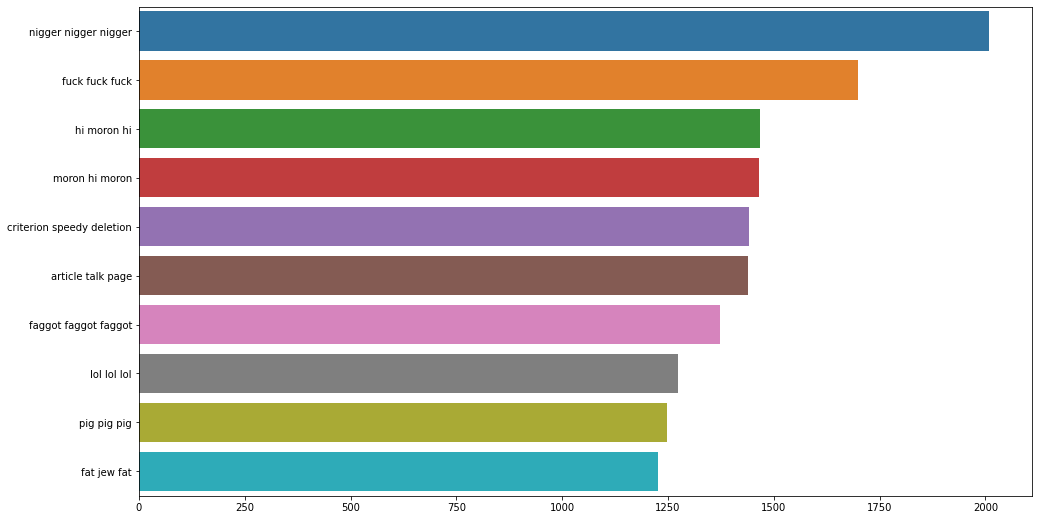

In [71]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(dff.comment_text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

#Separating Input and target features

In [101]:
x=dff["comment_text"]
x.head()

0    explanation edits made username hardcore metal...
1    daww match background colour im seemingly stuc...
2    hey man im really trying edit war guy constant...
3    cant make real suggestion improvement wondered...
4                  sir hero chance remember page thats
Name: comment_text, dtype: object

In [102]:
y1=dff["Malignant Comment"]
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Malignant Comment, dtype: int64

In [ ]:
y=pd.DataFrame()
y=y1

#Vectorize

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = CountVectorizer()
vect.fit_transform(x)

freq_term_matrix = vect.transform(x)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

# Training Dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,classification_report,auc,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
lg = LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(tf_idf_matrix,y,test_size=0.2,random_state=95)

In [ ]:
lg.fit(x_train,y_train) 
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
print("Train Accuracy : ",round(accuracy_score(y_train,pred_train)*100,2))
print("Test Accuracy : ",round(accuracy_score(y_test,pred_test)*100,2))
cv_score=cross_val_score(lg,tf_idf_matrix,y,cv=5)
print("cv score : ", round(cv_score.mean()*100,2))

Train Accuracy :  96.04
Test Accuracy :  95.69
cv score :  95.61


In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, lg.predict_proba(x_test))
logloss


0.11876382098273715

In [ ]:
print("Classification Report:\n",classification_report(y_test,pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     28692
           1       0.93      0.62      0.74      3223

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix\n",confusion_matrix(y_test,pred_test))

Confusion Matrix
 [[28535   157]
 [ 1218  2005]]


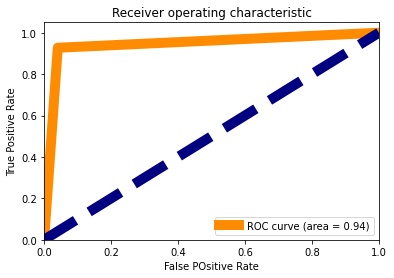

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()
    

#Model Selection

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    cv_score=cross_val_score(algorithm_instance,tf_idf_matrix,y,cv=5)
    print("cv score : ", round(cv_score.mean()*100,2))
    logloss = log_loss(y_test, algorithm_instance.predict_proba(x_test))
    print("Log loss: ",logloss)
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   
    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()


#KNeighbors Classifier

Accuracy of training model : 92.32
Accuracy of test data : 91.51
cv score :  91.51
Log loss:  1.7830867845874572

Classification report for test data
               precision    recall  f1-score   support

           0       0.92      1.00      0.95     28692
           1       0.83      0.20      0.32      3223

    accuracy                           0.92     31915
   macro avg       0.87      0.60      0.64     31915
weighted avg       0.91      0.92      0.89     31915

Classification report for training data
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    114654
           1       0.92      0.27      0.42     13002

    accuracy                           0.92    127656
   macro avg       0.92      0.63      0.69    127656
weighted avg       0.92      0.92      0.90    127656

Confusion Matrix
 [[28559   133]
 [ 2578   645]]




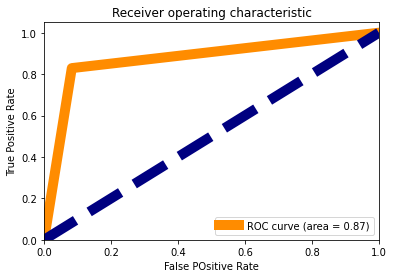

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVC Model

Accuracy of training model : 98.86
Accuracy of test data : 95.65
cv score :  95.6

Classification report for test data
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     28692
           1       0.94      0.61      0.74      3223

    accuracy                           0.96     31915
   macro avg       0.95      0.80      0.86     31915
weighted avg       0.96      0.96      0.95     31915

Classification report for training data
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    114654
           1       0.99      0.89      0.94     13002

    accuracy                           0.99    127656
   macro avg       0.99      0.95      0.97    127656
weighted avg       0.99      0.99      0.99    127656

Confusion Matrix
 [[28560   132]
 [ 1256  1967]]




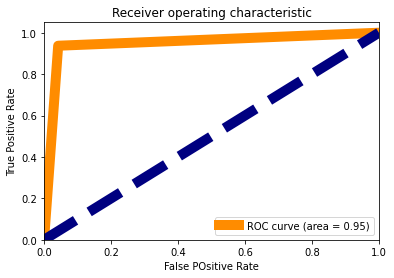

In [ ]:
from sklearn import svm
s=svm.SVC()
model_selection(s,x_train,y_train,x_test,y_test)

#Multinominal Naive Bayes

Accuracy of training model : 94.56
Accuracy of test data : 94.26
cv score :  94.17
Log loss:  0.15682396693381728

Classification report for test data
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     28692
           1       0.96      0.45      0.61      3223

    accuracy                           0.94     31915
   macro avg       0.95      0.72      0.79     31915
weighted avg       0.94      0.94      0.93     31915

Classification report for training data
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    114654
           1       0.97      0.48      0.64     13002

    accuracy                           0.95    127656
   macro avg       0.96      0.74      0.81    127656
weighted avg       0.95      0.95      0.94    127656

Confusion Matrix
 [[28632    60]
 [ 1771  1452]]




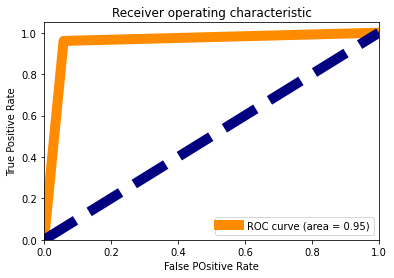

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
model_selection(mnb,x_train,y_train,x_test,y_test)

#Ensemble Method

# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,50)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_features': 'auto', 'n_estimators': 50}


Accuracy of training model : 93.44
Accuracy of test data : 93.46
cv score :  93.39

Classification report for test data
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     28692
           1       0.97      0.36      0.53      3223

    accuracy                           0.93     31915
   macro avg       0.95      0.68      0.75     31915
weighted avg       0.94      0.93      0.92     31915

Classification report for training data
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    114654
           1       0.97      0.37      0.53     13002

    accuracy                           0.93    127656
   macro avg       0.95      0.68      0.75    127656
weighted avg       0.94      0.93      0.92    127656

Confusion Matrix
 [[28651    41]
 [ 2047  1176]]




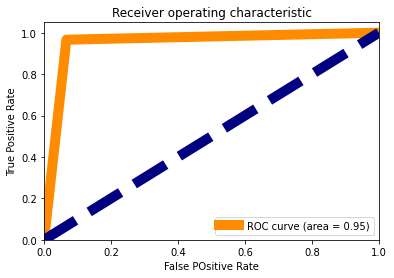

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rf3=GradientBoostingClassifier(criterion='friedman_mse', loss='deviance', max_features= 'auto', n_estimators= 50)
model_selection(rf3,x_train,y_train,x_test,y_test)

# Model Saving

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(lg,open(filename,'wb'))

We selected Logistic Regression model since
- it has best cross validation score among all the model and high accuracy.
- it has highest auc score of 1.0

# Loading Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Accuracy: ",result*100)

Model Accuracy:  95.6916810277299


#Loading Test Dataset

In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test.shape

(153164, 2)

#Checking Null Values

In [ ]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


# Test Data Cleaning

In [ ]:
dff=test.copy()

In [ ]:
dff=dff.drop(['id'],axis=1)
dff.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [ ]:
dff.iloc[0,0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_http(text):
    return re.sub(r'http\S+', '', text)

In [ ]:
dff['comment_text']=dff['comment_text'].apply(strip_html)

In [ ]:
dff['comment_text']=dff['comment_text'].apply(remove_http)
dff["comment_text"] = dff["comment_text"].apply(lambda x: " ".join(x for x in x.split() if '.com' not in x))
dff["comment_text"] = dff["comment_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
dff["comment_text"] = dff["comment_text"].str.replace('\d','')
dff["comment_text"] = dff["comment_text"].str.replace('[^\w\s]','')

In [ ]:
from nltk.corpus import stopwords
import re,string
s = set(stopwords.words("english"))
p = list(string.punctuation)
s.update(p)

dff["comment_text"] = dff["comment_text"].apply(lambda x: " ".join(x for x in x.split() if x not in s))

In [ ]:
from textblob import Word
dff["comment_text"] = dff["comment_text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
dff["comment_text"] = dff["comment_text"].apply(lambda x: ' '.join( [x for x in x.split() if len(x)>1] ))

In [ ]:
test.iloc[1,0]

'0000247867823ef7'

In [ ]:
dff.iloc[1,0]

'rfc title fine imo'

In [ ]:
for i in range(dff.shape[0]):
    if (not(dff.iloc[i,0] and dff.iloc[i,0].strip())):
      dff=dff.drop(i)

# Test Data Vectorize

In [ ]:
dff["comment_text"]

0         yo bitch ja rule succesful youll ever whats ha...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                             dont anonymously edit article
                                ...                        
153159              totally agree stuff nothing toolongcrap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome im fool think ki...
Name: comment_text, Length: 153164, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = CountVectorizer(max_features=30000)
vect.fit_transform(dff["comment_text"])

freq_term_matrix = vect.transform(dff["comment_text"])
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

#Test Data Prediction

In [ ]:
tf_idf_matrix 

<153164x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 3439579 stored elements in Compressed Sparse Row format>

In [ ]:
test_output=pd.DataFrame(loaded_model.predict(tf_idf_matrix ),columns=["Malignant"])
test_output.head()

,Malignant
0,0
1,0
2,0
3,0
4,0


In [ ]:
test2=pd.concat([test,test_output],axis=1)
test2.head()

,id,comment_text,Malignant
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0


In [ ]:
test2.iloc[1944,:]

id              03582de488a5d84b
comment_text     Total bullshit.
Malignant                      1
Name: 1944, dtype: object